# UMAP Visualization
This notebook generates a UMAP visualization of the 768-dimensional output features of the CSMAE model for the training set.

We only use a fraction of the samples to reduce computation time and increase visual clarity.

In [6]:
import numpy as np
import umap
import umap.plot
import pickle
import pandas as pd

In [2]:
EVERY_NTH_SAMPLE = 10

with open("train.pkl", "rb") as f:
    keys, labels, outputs = pickle.load(f)
X = np.array(outputs[::EVERY_NTH_SAMPLE])
Y = np.array(labels[::EVERY_NTH_SAMPLE])
X.shape, Y.shape

((26970, 768), (26970, 19))

In [3]:
mapper = umap.UMAP().fit(X)

/home/kleincode/.local/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [24]:
from cProfile import label


BEN19_LABELS = {
    "Urban fabric": 0,
    "Industrial or commercial units": 1,
    "Arable land": 2,
    "Permanent crops": 3,
    "Pastures": 4,
    "Complex cultivation patterns": 5,
    "Land principally occupied by agriculture, with significant areas of natural vegetation": 6,
    "Agro-forestry areas": 7,
    "Broad-leaved forest": 8,
    "Coniferous forest": 9,
    "Mixed forest": 10,
    "Natural grassland and sparsely vegetated areas": 11,
    "Moors, heathland and sclerophyllous vegetation": 12,
    "Transitional woodland, shrub": 13,
    "Beaches, dunes, sands": 14,
    "Inland wetlands": 15,
    "Coastal wetlands": 16,
    "Inland waters": 17,
    "Marine waters": 18
}
label_counts = np.sum(Y, axis=0, dtype=int)
assert label_counts.shape == (19,)
label_counts = pd.DataFrame({"class_name": BEN19_LABELS.keys(), "count": label_counts, "class_index": BEN19_LABELS.values()})
label_counts.sort_values("count", ascending=False, inplace=True)
label_counts

,class_name,count,class_index
2,Arable land,10017,2
10,Mixed forest,9118,10
9,Coniferous forest,8655,9
13,"Transitional woodland, shrub",7713,13
8,Broad-leaved forest,7328,8
6,"Land principally occupied by agriculture, with...",6688,6
5,Complex cultivation patterns,5419,5
4,Pastures,5156,4
18,Marine waters,3902,18
0,Urban fabric,3863,0


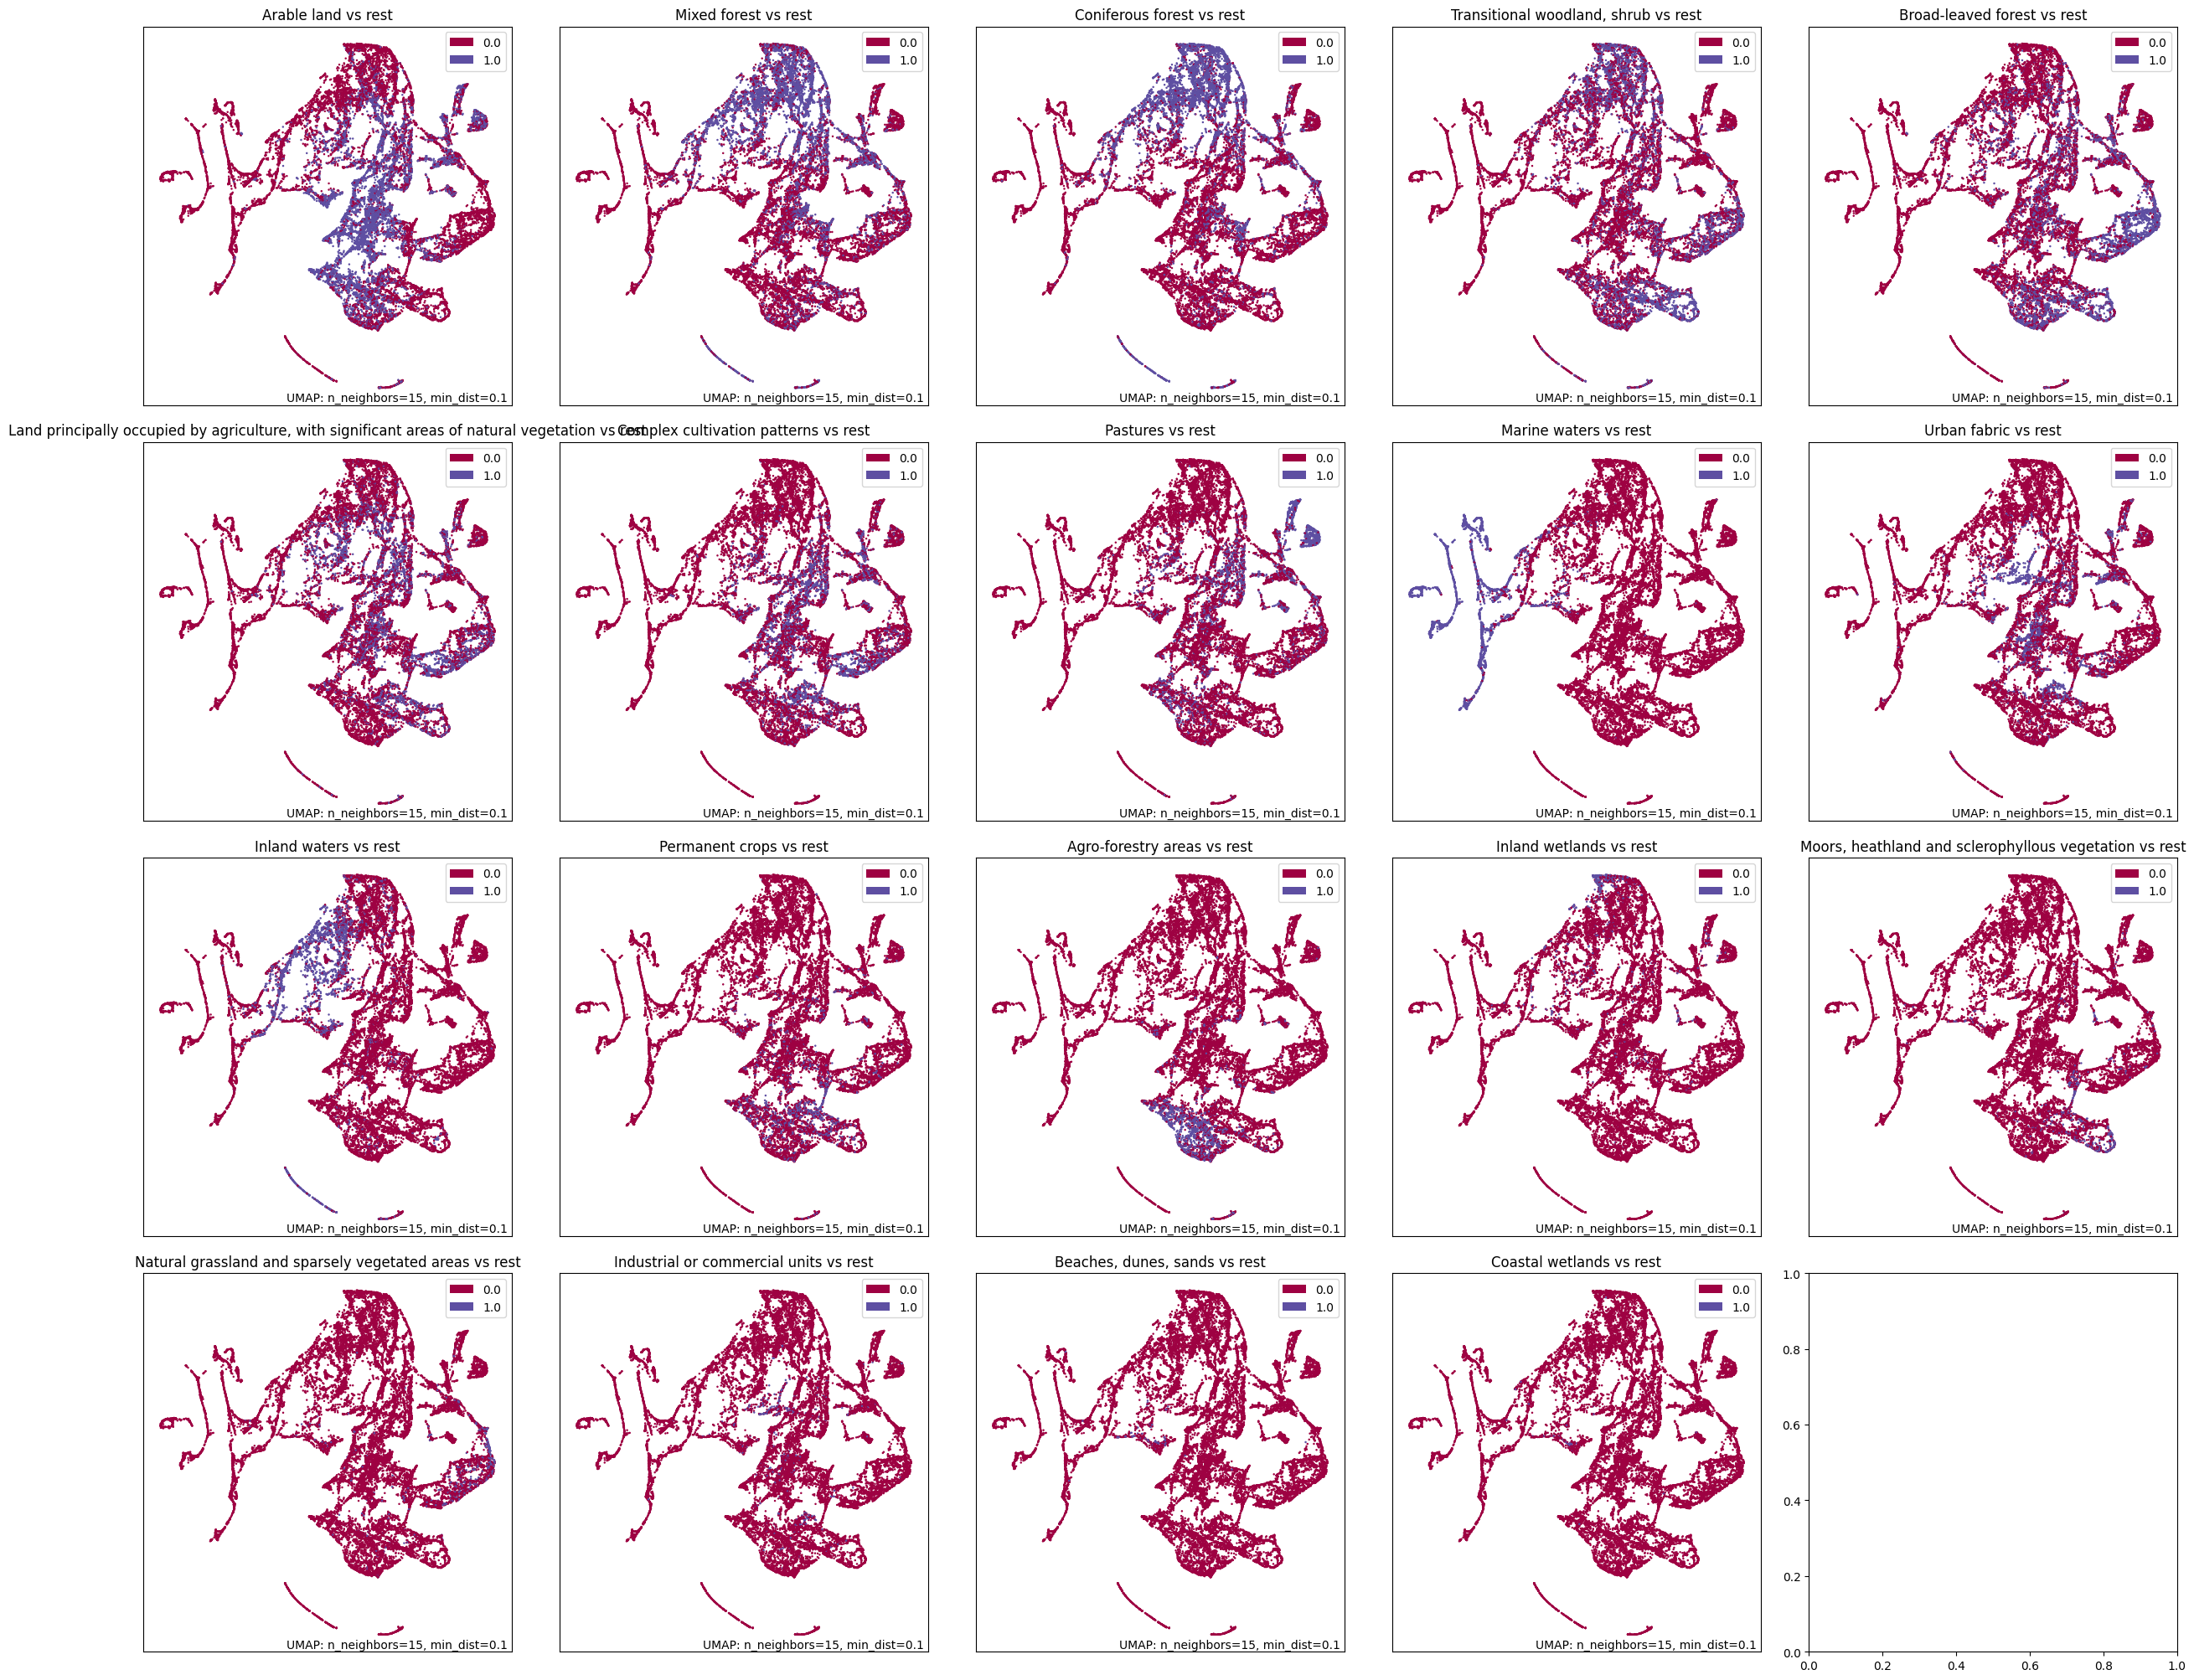

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 5, squeeze=True)
fig.set_size_inches(25, 20)
fig.tight_layout()
axs = axs.flatten()[:19]
for i, ax in enumerate(axs):
    class_idx, class_name = label_counts.iloc[i].class_index, label_counts.iloc[i].class_name
    umap.plot.points(mapper, labels=Y[:,class_idx], ax=ax)
    ax.set_title(f"{class_name} vs rest")
fig.savefig("umap_viz.pdf")
fig.savefig("umap_viz.png")
plt.show()

<Axes: >

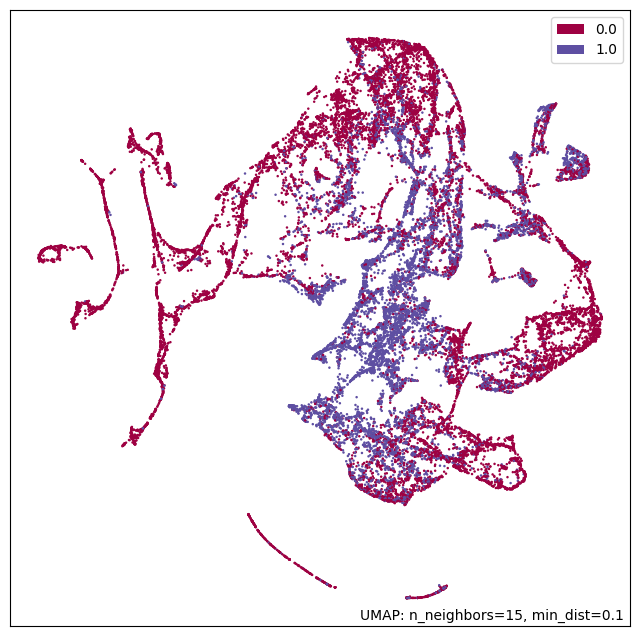

In [27]:
umap.plot.points(mapper, labels=Y[:,2])

<Axes: >

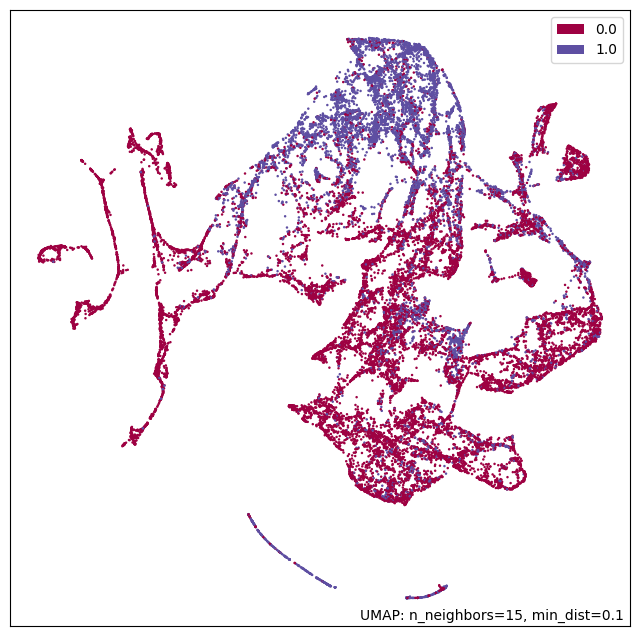

In [28]:
umap.plot.points(mapper, labels=Y[:,9])

<Axes: >

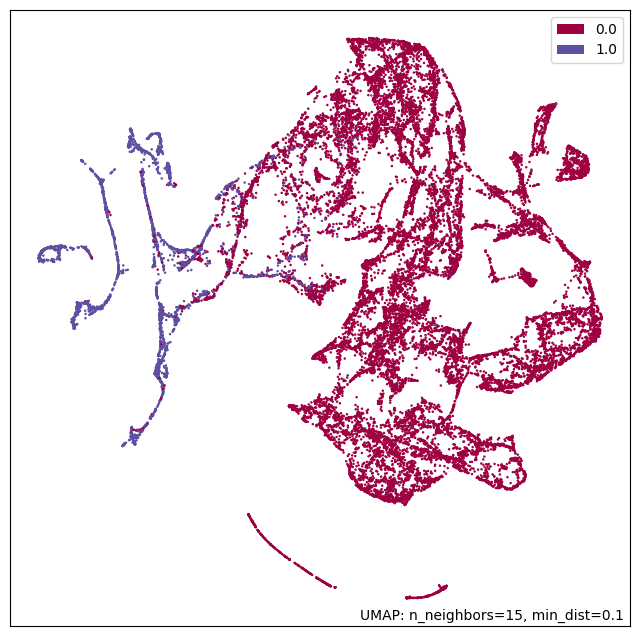

In [29]:
umap.plot.points(mapper, labels=Y[:,18])

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

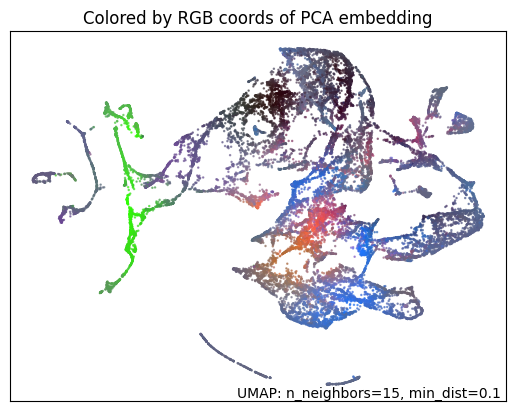

In [30]:
umap.plot.diagnostic(mapper, diagnostic_type="pca")